# Predicting NBA Hall of Famers Using Machine Learning

The goal of this Notebook is to use the former NBA player dataset to train and test different machine learning models to predict whether a player will be in the Hall of Fame or not. After the models have been trained and tested, we will find the best model and then predict which current and recent NBA players will be future Hall of Famers.

In [1]:
# Import all the necessary libraries
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import scipy.optimize as opt

Let's take a look at our former player dataset.

In [2]:
# Load the files from my Google Drive
former_df = pd.read_csv('/content/drive/MyDrive/former_players.csv')
recent_df = pd.read_csv('/content/drive/MyDrive/recent_players.csv')
former_df

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,1,0,0,2,6,6,1,0,1
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Derrick Zimmerman,2006,2006,1,G,6-3,6.250000,195.0,2,2.0,...,0,0,0,0,0,0,0,0,0,0
4018,Stephen Zimmerman,2017,2017,1,C,7-0,7.000000,240.0,19,1.2,...,0,0,0,0,0,0,0,0,0,0
4019,Jim Zoet,1983,1983,1,C,7-1,7.083333,240.0,7,0.3,...,0,0,0,0,0,0,0,0,0,0
4020,Bill Zopf,1971,1971,1,G,6-1,6.083333,170.0,53,2.2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
former_HOF = former_df[former_df['HOF'] == 1]
former_HOF.describe()

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,...,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.0
mean,1970.374233,1981.865031,12.490798,6.518916,208.251534,846.969325,16.638037,7.178528,3.575460,45.635583,...,0.122699,0.226994,0.386503,0.0,0.233129,0.380368,1.625767,0.386503,0.098160,1.0
std,15.229555,17.652515,4.073958,0.331179,26.962558,312.011741,5.484819,3.973022,1.949805,5.443454,...,0.553028,0.420179,0.764370,0.0,0.733422,0.995103,2.131729,0.488449,0.298447,0.0
min,1947.000000,1950.000000,2.000000,5.750000,150.000000,74.000000,3.500000,1.400000,0.300000,30.200000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1957.500000,1969.000000,10.000000,6.333333,190.000000,652.000000,12.550000,4.050000,2.150000,42.650000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1968.000000,1980.000000,13.000000,6.500000,210.000000,852.000000,17.500000,6.300000,3.200000,45.600000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,1983.000000,1995.500000,15.000000,6.750000,225.000000,1036.000000,20.150000,9.800000,4.400000,49.900000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,2.000000,1.000000,0.000000,1.0
max,2004.000000,2017.000000,21.000000,7.500000,325.000000,1611.000000,30.100000,22.900000,11.200000,58.200000,...,4.000000,1.000000,4.000000,0.0,6.000000,6.000000,11.000000,1.000000,1.000000,1.0


We can see that HOF players tend to be very efficient and provide value across multiple statistical categories. For example, they average 16.6 points, 7.2 rebounds, and 3.6 assists per game while also having a 45.6% field goal percentage. They also have long lasting careers, typically lasting 12 and a half years and playing 847 games. HOF players also average 1.6 championships, meaning team success is an important factor as well. 

Our target variable is 'HOF', which is a either a 0 or a 1, depending if a player is in the Hall of Fame or not. Since there are only 2 possible values, we will need to use a classification model. 

In [4]:
former_df.columns

Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team', 'HOF'],
      dtype='object')

We can take a look at the columns, knowing that we will want to use most of them for the training, testing, and predicting. However, for the 'Pos' column we will have to apply one hot encoding in order to convert it into binary values that we can include in the model.

In [5]:
X = former_df[['Years', 'Height', 'Wt', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 
               'eFG%', 'PER', 'WS', 'All Star', 'All NBA', 'All ABA', 'All Rookie', 
               'All Defensive', 'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 
               'Scoring Champ', 'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 
               'CF MVP', 'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team', 'ABA All-Time Team']]
X = pd.concat([X,pd.get_dummies(former_df['Pos'])], axis=1)
X

,Years,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,...,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,C,F,F-C,G,G-F
0,5,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,...,0,0,0,0,0,0,0,1,0,0
1,10,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,...,0,0,0,0,0,0,0,1,0,0
2,20,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,...,2,6,6,1,0,1,0,0,0,0
3,11,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,...,0,0,0,0,0,0,0,0,1,0
4,6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,1,6.250000,195.0,2,2.0,2.0,3.5,66.7,27.9,73.7,...,0,0,0,0,0,0,0,0,1,0
4018,1,7.000000,240.0,19,1.2,1.8,0.2,32.3,14.2,60.0,...,0,0,0,0,0,1,0,0,0,0
4019,1,7.083333,240.0,7,0.3,1.1,0.1,20.0,14.2,62.5,...,0,0,0,0,0,1,0,0,0,0
4020,1,6.083333,170.0,53,2.2,0.9,1.4,36.3,27.9,55.6,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Set up target variable
Y = former_df['HOF']

Now we need to split our former player dataset into training and testing sets. We will use a testing size of 20% and set the random state to 10 so we get the same training and testing sets every time. 

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

## SVC

The first model we will use is Support Vector Classification (SVC). We will set up a pipeline with the SVC model and StandardScaler to normalize all of the data so that no column affects the outcome more than the others. 

In [8]:
pipe = Pipeline([('scale', StandardScaler()), ('SVC', SVC())])

Next we take a look at the parameters in the pipeline to get an idea of which ones we should target to test for the best possible values.

In [9]:
pipe.get_params()

{'SVC': SVC(),
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False,
 'memory': None,
 'scale': StandardScaler(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'steps': [('scale', StandardScaler()), ('SVC', SVC())],
 'verbose': False}

We will test different values for 'C' and the type of SVC kernel.

In [10]:
parameters = {'SVC__C':np.arange(0.01,11,1), 'SVC__kernel':['linear', 'rbf', 'poly', 'sigmoid']}

In [11]:
# Run GridSearchCV to find the best parameters
svc_cv = GridSearchCV(pipe, parameters, cv=10)
svc_cv.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': array([1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
       6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01]),
                         'SVC__kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

After we find the best parameters, we will calculate the accuracy of the model in predicting the training dataset. We will also calculate the cross validation score of the training dataset and print the best parameters for the model.

In [12]:
score = svc_cv.score(xtrain, ytrain)
print("Mean accuracy of the model:", score)
print("The best parameters are %s with a cross validation score of %0.5f" % (svc_cv.best_params_, svc_cv.best_score_))

Mean accuracy of the model: 0.9881877525645011
The best parameters are {'SVC__C': 1.01, 'SVC__kernel': 'linear'} with a cross validation score of 0.98446


After this, we will use the model to predict values for the test dataset and present the data in a confusion matrix.

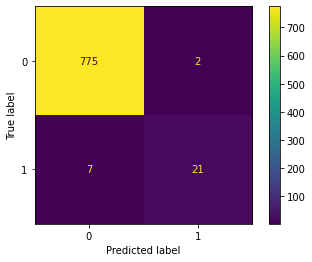

In [13]:
s_pred = svc_cv.predict(xtest)
cm = confusion_matrix(ytest, s_pred)
s_cmd = cmd(cm).plot()

From the confusion matrix for the test dataset, we can see the SVC model had 21 true positives, 775 true negatives, 2 false positives, and 7 false negatives. In other words, the model thought that 7 players who are in the Hall of Fame shouldn't be in, and it also thought that 2 players who aren't currently in the HOF should be. It is important to note that the HOF is an evolving entity, and that some of these players who may not be in it right now could be inducted in the near future.

Next, we will print the classification report which gives us insight into how the model performed. 

In [14]:
cr = classification_report(ytest, s_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       777
           1       0.91      0.75      0.82        28

    accuracy                           0.99       805
   macro avg       0.95      0.87      0.91       805
weighted avg       0.99      0.99      0.99       805



For this SVC model, the values for precision, recall, and accuracy are all very high. However, it seems this model may tend to leave out a few players from the HOF that are actually in it.

Now we will use this model to predict the current and recent players that will be in the HOF.

In [15]:
# Create the x variable for current and recent players
recent_x = recent_df[['Years', 'Height','Wt', 'G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 
               'eFG%', 'PER', 'WS', 'All Star', 'All NBA', 'All ABA', 'All Rookie', 
               'All Defensive', 'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 
               'Scoring Champ', 'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 
               'CF MVP', 'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team', 'ABA All-Time Team']]
# Get dummies for players positions
recent_x = pd.concat([recent_x,pd.get_dummies(recent_df['Pos'])], axis=1)

In [16]:
# Predict HOF current and recent players
svc_pred = svc_cv.predict(recent_x)

After predicting which players will be in the HOF with the SVC model, we can add the predictions to the recent player dataset. We will do this so that we can view the players the model thinks will be future HOFers. This allows us to gain insight into what the SVC model (and the rest of the models) values most from a HOF player. 

In [17]:
# Add the HOF column to the current and recent player dataset
recent_df['HOF'] = svc_pred

In [18]:
# Create a new DataFrame of only players designated as Future HOFers
svc_HOF = recent_df[recent_df['HOF'] == 1]
svc_HOF

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
11,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,1
26,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,1,0,1,0,1,2,1,1,0,1
29,Carmelo Anthony,2004,2022,19,F,6-7,6.583333,238.0,1260,22.5,...,0,0,0,0,0,0,0,1,0,1
158,Vince Carter,1999,2020,22,G-F,6-6,6.500000,220.0,1541,16.7,...,0,1,0,0,0,0,0,0,0,1
213,Stephen Curry,2010,2022,13,G,6-2,6.166667,185.0,826,24.3,...,0,0,1,1,1,2,4,1,0,1
216,Anthony Davis,2013,2022,10,F-C,6-10,6.833333,253.0,604,23.8,...,0,0,1,0,0,0,1,1,0,1
222,DeMar DeRozan,2010,2022,13,G-F,6-6,6.500000,220.0,957,20.8,...,0,0,0,0,0,0,0,0,0,1
237,Luka Dončić,2019,2022,4,G-F,6-7,6.583333,230.0,264,26.4,...,0,1,0,0,0,0,0,0,0,1
254,Kevin Durant,2008,2022,15,G-F,6-10,6.833333,240.0,939,27.2,...,0,1,2,0,2,1,2,1,0,1
266,Joel Embiid,2017,2022,6,C,7-0,7.000000,280.0,328,26.0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
svc_HOF.describe()

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.0,28.0
mean,2009.000000,2021.464286,13.464286,6.580357,229.142857,905.285714,20.507143,6.95000,4.692857,48.614286,...,0.357143,0.321429,0.500000,0.035714,0.464286,0.50000,1.250000,0.464286,0.0,1.0
std,5.277485,1.104943,4.622667,0.330608,28.737270,339.972859,4.549068,2.66868,2.250256,4.906059,...,0.869835,0.475595,0.793492,0.188982,0.922241,0.96225,1.530553,0.507875,0.0,0.0
min,1999.000000,2019.000000,4.000000,6.000000,175.000000,264.000000,8.700000,2.70000,1.300000,42.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0
25%,2004.750000,2022.000000,10.000000,6.312500,211.250000,638.000000,17.825000,4.47500,2.850000,45.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0
50%,2010.000000,2022.000000,13.000000,6.583333,230.000000,940.500000,20.750000,7.00000,4.450000,47.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.0,1.0
75%,2013.000000,2022.000000,17.250000,6.854167,250.000000,1172.750000,23.925000,8.67500,6.350000,49.825000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,2.000000,1.000000,0.0,1.0
max,2019.000000,2022.000000,22.000000,7.083333,284.000000,1541.000000,27.200000,11.80000,9.500000,65.300000,...,3.000000,1.000000,3.000000,1.000000,4.000000,4.00000,4.000000,1.000000,0.0,1.0


For the SVC model, it predicted that 27 current and recent players will be in the HOF, including LeBron James, Stephen Curry, Kevin Durant, and Dirk Nowitzki. The model's average HOF player averages 929 games played, 20.3 points per game, and 1.3 Championships. 

## Logistic Regression

The next model we will train, test, and predict with is Logistic Regression. We again set up our pipeline feature with the normalizing function, but this time we have the model set to logistic regression. 

In [20]:
pipe = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression())])

In [21]:
# Get parameters for this pipeline
pipe.get_params()

{'logistic': LogisticRegression(),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'memory': None,
 'scale': StandardScaler(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'steps': [('scale', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False}

We will again test the C parameter to find the best value for the model. Then we will use the model to predict values for the test dataset, comparing those predictions to the actual values. 

In [22]:
# Parameters to test to find the best model
parameters ={'logistic__C':[0.01,10,1]}

In [23]:
lr_cv = GridSearchCV(pipe, parameters, cv=10)
lr_cv.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 10, 1]})

In [24]:
score = lr_cv.score(xtrain, ytrain)
print("Mean accuracy of the model:", score)
print("The best parameters are %s with a cross validation score of %0.5f" % (lr_cv.best_params_, lr_cv.best_score_))

Mean accuracy of the model: 0.9875660553310538
The best parameters are {'logistic__C': 1} with a cross validation score of 0.98353


The accuracy of this logistic regression model is slightly lower than the SVC model, but it is still very accurate at 98.76%. Next, we will take a look at the confusion matrix for this model.

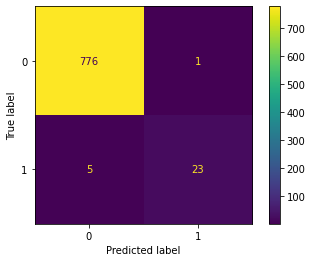

In [25]:
# Predict values for the test dataset
l_pred = lr_cv.predict(xtest)
cm = confusion_matrix(ytest, l_pred)
l_cmd = cmd(cm).plot()

We can see that this model actually did a better job with the test set than the SVC model, as it only had 1 false positive and 5 false negatives. 

In [26]:
cr = classification_report(ytest, l_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       777
           1       0.96      0.82      0.88        28

    accuracy                           0.99       805
   macro avg       0.98      0.91      0.94       805
weighted avg       0.99      0.99      0.99       805



From the classification report, we see that the model is more accurate than the SVC model, but still tends to leave a few HOFers out that are actually in the HOF.

Now we will predict which current and recent players will be in the HOF with the logistic regression model.

In [27]:
lr_pred = lr_cv.predict(recent_x)

In [28]:
# Remove the previous models values for 'HOF'
del recent_df['HOF']

In [29]:
recent_df['HOF'] = lr_pred

In [30]:
lr_HOF = recent_df[recent_df['HOF'] == 1]
lr_HOF

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
11,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,1
26,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,1,0,1,0,1,2,1,1,0,1
29,Carmelo Anthony,2004,2022,19,F,6-7,6.583333,238.0,1260,22.5,...,0,0,0,0,0,0,0,1,0,1
158,Vince Carter,1999,2020,22,G-F,6-6,6.500000,220.0,1541,16.7,...,0,1,0,0,0,0,0,0,0,1
213,Stephen Curry,2010,2022,13,G,6-2,6.166667,185.0,826,24.3,...,0,0,1,1,1,2,4,1,0,1
216,Anthony Davis,2013,2022,10,F-C,6-10,6.833333,253.0,604,23.8,...,0,0,1,0,0,0,1,1,0,1
237,Luka Dončić,2019,2022,4,G-F,6-7,6.583333,230.0,264,26.4,...,0,1,0,0,0,0,0,0,0,1
254,Kevin Durant,2008,2022,15,G-F,6-10,6.833333,240.0,939,27.2,...,0,1,2,0,2,1,2,1,0,1
266,Joel Embiid,2017,2022,6,C,7-0,7.000000,280.0,328,26.0,...,0,0,0,0,0,0,0,0,0,1
309,Marc Gasol,2009,2021,13,C,6-11,6.916667,255.0,891,14.0,...,1,0,0,0,0,0,1,0,0,1


In [31]:
lr_HOF.describe()

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,2008.833333,2021.300000,13.466667,6.580556,228.866667,898.400000,19.993333,6.846667,4.793333,48.353333,...,0.366667,0.300000,0.466667,0.033333,0.433333,0.466667,1.333333,0.433333,0.0,1.0
std,5.219878,1.235956,4.508485,0.330797,28.665410,333.490278,4.723378,2.656123,2.331779,4.875536,...,0.850287,0.466092,0.776079,0.182574,0.897634,0.937102,1.561019,0.504007,0.0,0.0
min,1999.000000,2018.000000,4.000000,6.000000,175.000000,264.000000,8.700000,2.700000,1.300000,42.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,2004.250000,2021.000000,10.000000,6.270833,206.250000,621.500000,16.775000,4.425000,2.950000,44.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,2009.500000,2022.000000,13.000000,6.583333,230.000000,915.000000,19.750000,7.000000,4.450000,47.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0
75%,2012.750000,2022.000000,16.750000,6.895833,250.000000,1135.250000,23.625000,8.425000,6.450000,49.525000,...,0.000000,1.000000,1.000000,0.000000,0.750000,0.750000,2.000000,1.000000,0.0,1.0
max,2019.000000,2022.000000,22.000000,7.083333,284.000000,1541.000000,27.200000,11.800000,9.500000,65.300000,...,3.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,1.000000,0.0,1.0


In [32]:
print("Players in SVC Model that aren't in the Logistic Regression Model:")
for value in list(svc_HOF.Player):
  if not value in list(lr_HOF.Player):
      print(value)
print('----------------------')
print("Players in Logistic Regression Model that aren't in the SVC Model:")
for value in list(lr_HOF.Player):
  if not value in list(svc_HOF.Player):
      print(value)

Players in SVC Model that aren't in the Logistic Regression Model:
DeMar DeRozan
----------------------
Players in Logistic Regression Model that aren't in the SVC Model:
Marc Gasol
Manu Ginóbili*
John Wall


With the logistic regression model, it predicted that 30 players will be in the HOF. We can see that there are the same notable names in this model compared to the SVC model, including LeBron James, Kevin Durant, Steph Curry, and Dirk Nowiztki. This model doesn't include Demar DeReozan, but the SVC model did. This model also has 4 players that weren't in the previous model. The average HOF player for this model averages 898 games, 20 points per game, and 1.33 championships. 

## Decision Tree

Now we will follow the same outline for our next model, a decision tree.

In [33]:
# Set up pipeline feature
pipe = Pipeline([('scale', StandardScaler()), ('tree', DecisionTreeClassifier())])

In [34]:
# Find parameters for the model
pipe.get_params()

{'memory': None,
 'scale': StandardScaler(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'steps': [('scale', StandardScaler()), ('tree', DecisionTreeClassifier())],
 'tree': DecisionTreeClassifier(),
 'tree__ccp_alpha': 0.0,
 'tree__class_weight': None,
 'tree__criterion': 'gini',
 'tree__max_depth': None,
 'tree__max_features': None,
 'tree__max_leaf_nodes': None,
 'tree__min_impurity_decrease': 0.0,
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2,
 'tree__min_weight_fraction_leaf': 0.0,
 'tree__random_state': None,
 'tree__splitter': 'best',
 'verbose': False}

In [35]:
# Parameters to test to find the best model
parameters = {'tree__criterion': ['gini', 'entropy'],
     'tree__splitter': ['best', 'random'],
     'tree__max_depth': [2*n for n in range(1,10)],
     'tree__max_features': ['auto', 'sqrt'],
     'tree__min_samples_leaf': [1, 2, 4],
     'tree__min_samples_split': [2, 5, 10]}

In [36]:
# Find best parameters for model and then train it
tree_cv = GridSearchCV(pipe, parameters, cv=10)
tree_cv.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'tree__max_features': ['auto', 'sqrt'],
                         'tree__min_samples_leaf': [1, 2, 4],
                         'tree__min_samples_split': [2, 5, 10],
                         'tree__splitter': ['best', 'random']})

In [37]:
score = tree_cv.score(xtrain, ytrain)
print("Mean accuracy of the model:", score)
print("The best parameters are %s with a cross validation score of %0.5f" % (tree_cv.best_params_, tree_cv.best_score_))

Mean accuracy of the model: 0.9869443580976065
The best parameters are {'tree__criterion': 'entropy', 'tree__max_depth': 6, 'tree__max_features': 'auto', 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 5, 'tree__splitter': 'best'} with a cross validation score of 0.98073


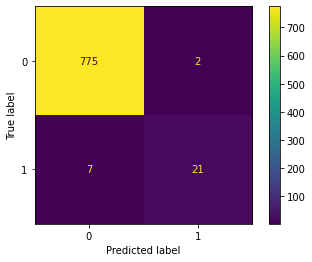

In [38]:
# Predict values for the test set
dt_pred = tree_cv.predict(xtest)
cm = confusion_matrix(ytest, dt_pred)
dt_cmd = cmd(cm).plot()

In [39]:
cr = classification_report(ytest, dt_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       777
           1       0.91      0.75      0.82        28

    accuracy                           0.99       805
   macro avg       0.95      0.87      0.91       805
weighted avg       0.99      0.99      0.99       805



We can see that this model has 3 false positives and 9 false negatives, which is much less accurate than the previous models. 

In [40]:
# Predict recent and current players that will be in the HOF
tree_pred = tree_cv.predict(recent_x)

In [41]:
# Remove values for prevous model
del recent_df['HOF']

In [42]:
recent_df['HOF'] = tree_pred

In [43]:
tree_HOF = recent_df[recent_df['HOF'] == 1]
tree_HOF

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
11,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,1
26,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,1,0,1,0,1,2,1,1,0,1
29,Carmelo Anthony,2004,2022,19,F,6-7,6.583333,238.0,1260,22.5,...,0,0,0,0,0,0,0,1,0,1
144,Jimmy Butler,2012,2022,11,G-F,6-7,6.583333,230.0,690,17.7,...,0,0,0,0,0,0,0,0,0,1
158,Vince Carter,1999,2020,22,G-F,6-6,6.500000,220.0,1541,16.7,...,0,1,0,0,0,0,0,0,0,1
213,Stephen Curry,2010,2022,13,G,6-2,6.166667,185.0,826,24.3,...,0,0,1,1,1,2,4,1,0,1
216,Anthony Davis,2013,2022,10,F-C,6-10,6.833333,253.0,604,23.8,...,0,0,1,0,0,0,1,1,0,1
254,Kevin Durant,2008,2022,15,G-F,6-10,6.833333,240.0,939,27.2,...,0,1,2,0,2,1,2,1,0,1
266,Joel Embiid,2017,2022,6,C,7-0,7.000000,280.0,328,26.0,...,0,0,0,0,0,0,0,0,0,1
310,Pau Gasol,2002,2019,18,F-C,7-0,7.000000,250.0,1226,17.0,...,0,1,0,0,0,0,2,0,0,1


In [44]:
tree_HOF.describe()

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.0
mean,2008.461538,2021.538462,14.076923,6.631410,233.769231,928.384615,20.792308,7.030769,4.215385,47.873077,...,0.230769,0.269231,0.500000,0.038462,0.500000,0.538462,1.192308,0.461538,0.0,1.0
std,4.973777,1.028816,4.435521,0.267886,25.079566,327.563499,3.861805,2.530418,1.880147,3.813613,...,0.710363,0.452344,0.812404,0.196116,0.948683,0.989172,1.470217,0.508391,0.0,0.0
min,1999.000000,2019.000000,6.000000,6.166667,185.000000,328.000000,11.400000,3.500000,1.300000,43.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,2004.250000,2022.000000,11.000000,6.500000,220.000000,664.500000,18.050000,4.750000,2.750000,44.325000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,2009.500000,2022.000000,13.500000,6.625000,239.000000,882.500000,20.550000,6.750000,4.000000,47.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0
75%,2012.000000,2022.000000,18.000000,6.833333,250.000000,1225.250000,23.625000,8.950000,5.625000,49.525000,...,0.000000,0.750000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.0
max,2017.000000,2022.000000,22.000000,7.000000,284.000000,1541.000000,27.200000,11.800000,8.400000,58.700000,...,3.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,1.000000,0.0,1.0


From the eye test, this model seems to overvalue players who play the 'C-F' and 'C' positions. Interestingly enough, this is also shown in the height of the predict HOF players, where the average height is 6 feet 8 inches, whereas the average height of the former players that are in the HOF is 6 feet 6 inches. It predicts that 44 players will be in the HOF, a majority of them playing those 2 positions, and many of those players are most likely not worthy of being in the HOF. The average player in the HOF for this model averages 643 games played, 17.5 points per game, and 0.55 championships. So, at least from the eye test and basic analysis, this model is not very good at predicting HOF players.

## K-Nearest Neighbors

We next do the same process for the K-Nearest Neighbors model.

In [45]:
# Set up pipeline feature
pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [46]:
pipe.get_params()

{'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scale': StandardScaler(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'steps': [('scale', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False}

In [47]:
# Parameters to test to find the best model
parameters = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__p': [1,2]}

In [48]:
knn_cv = GridSearchCV(pipe, parameters, cv=10)
knn_cv.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'knn__p': [1, 2]})

In [49]:
score = knn_cv.score(xtrain, ytrain)
print("Mean accuracy of the model:", score)
print("The best parameters are %s with a cross validation score of %0.5f" % (knn_cv.best_params_, knn_cv.best_score_))

Mean accuracy of the model: 0.9872552067143301
The best parameters are {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 1} with a cross validation score of 0.98073


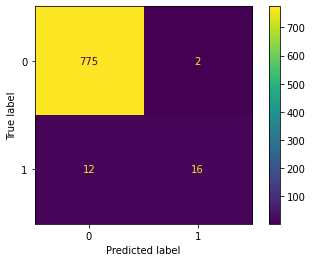

In [50]:
k_pred = knn_cv.predict(xtest)
cm = confusion_matrix(ytest, k_pred)
knn_cmd = cmd(cm).plot()

It seems this model is fine at predicting which players won't be in the HOF, but it tends to exclude a lot of players that actually are in the HOF. For example, there are only 2 false positives but there are 12 false negatives. 

In [51]:
cr = classification_report(ytest, k_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       777
           1       0.89      0.57      0.70        28

    accuracy                           0.98       805
   macro avg       0.94      0.78      0.84       805
weighted avg       0.98      0.98      0.98       805



In [52]:
knn_pred = knn_cv.predict(recent_x)

In [53]:
# Remove previous model's HOF values
del recent_df['HOF']

In [54]:
recent_df['HOF'] = knn_pred

In [55]:
knn_HOF = recent_df[recent_df['HOF'] == 1]
knn_HOF

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
11,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,1
26,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,1,0,1,0,1,2,1,1,0,1
29,Carmelo Anthony,2004,2022,19,F,6-7,6.583333,238.0,1260,22.5,...,0,0,0,0,0,0,0,1,0,1
213,Stephen Curry,2010,2022,13,G,6-2,6.166667,185.0,826,24.3,...,0,0,1,1,1,2,4,1,0,1
216,Anthony Davis,2013,2022,10,F-C,6-10,6.833333,253.0,604,23.8,...,0,0,1,0,0,0,1,1,0,1
222,DeMar DeRozan,2010,2022,13,G-F,6-6,6.500000,220.0,957,20.8,...,0,0,0,0,0,0,0,0,0,1
254,Kevin Durant,2008,2022,15,G-F,6-10,6.833333,240.0,939,27.2,...,0,1,2,0,2,1,2,1,0,1
266,Joel Embiid,2017,2022,6,C,7-0,7.000000,280.0,328,26.0,...,0,0,0,0,0,0,0,0,0,1
322,Rudy Gobert,2014,2022,9,C,7-1,7.083333,258.0,611,12.4,...,3,0,0,0,0,0,0,0,0,1
358,James Harden,2010,2022,13,G,6-5,6.416667,220.0,942,24.9,...,0,0,0,0,0,1,0,1,0,1


In [56]:
knn_HOF.describe()

,From,To,Years,Height,Wt,G,PTS,TRB,AST,FG%,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0
mean,2008.157895,2021.473684,14.315789,6.587719,228.789474,969.052632,20.984211,7.136842,4.568421,49.326316,...,0.473684,0.157895,0.684211,0.052632,0.684211,0.631579,1.263158,0.631579,0.0,1.0
std,4.633971,1.123903,4.083199,0.355158,29.626525,308.189421,4.267742,2.731343,2.440640,5.346426,...,1.020263,0.374634,0.885226,0.229416,1.056863,1.065130,1.484816,0.495595,0.0,0.0
min,1999.000000,2019.000000,6.000000,6.000000,175.000000,328.000000,12.400000,2.700000,1.300000,42.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,2004.500000,2022.000000,11.500000,6.291667,210.000000,741.000000,18.600000,4.650000,2.550000,46.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,2008.000000,2022.000000,15.000000,6.583333,238.000000,1021.000000,21.800000,7.100000,4.300000,49.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.0
75%,2011.000000,2022.000000,17.500000,6.875000,250.000000,1198.500000,24.050000,8.750000,6.400000,50.050000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.0
max,2017.000000,2022.000000,21.000000,7.083333,280.000000,1522.000000,27.200000,11.800000,9.500000,65.300000,...,3.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,1.000000,0.0,1.0


This model seems to have a higher standard for HOF worthy players than the other models. For example, the average HOF player for this model averages 969 games, 21 points per game, and 1.3 championships. The averages for games and points are well above the values for the former players that are in the HOF. 

## Finding the Best Model

Now we will run some tests to find which model does the best at predicting players to be in the HOF and we will use that one to come up with the final list of current and recent players that should be future HOFers. 

In [57]:
jc1=jaccard_score(ytest, k_pred, pos_label = 1)
fs1=f1_score(ytest, k_pred)

jc2=jaccard_score(ytest, dt_pred, pos_label = 1)
fs2=f1_score(ytest, dt_pred)

jc3=jaccard_score(ytest, s_pred, pos_label = 1)
fs3=f1_score(ytest, s_pred)

proba=lr_cv.predict_proba(xtest)
jc4=jaccard_score(ytest, l_pred, pos_label = 1)
fs4=f1_score(ytest, l_pred)  
ll4=log_loss(ytest, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVC','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.533333,0.695652,NA
Decision Tree,0.700000,0.823529,NA
SVC,0.700000,0.823529,NA
Logistic Regression,0.793103,0.884615,0.028172


Logistic regression has the best scores, and from the eye test seems to be the most reasonable model. However, there are a few players that stand out as anomalies as to how good they have been so far. Nikola Jokic, Joel Embiid, and Luka Doncic have all played less than 7 years and 530 games, yet they are expected to be in the HOF. This shows just how truly special these players have been, especially Doncic, who has only been in the NBA for 4 years. 

The last thing to do is view the players that will be future Hall of Famers according to our model. 

In [58]:
del recent_df['HOF']
recent_df['HOF'] = lr_pred
lr_HOF = recent_df[recent_df['HOF'] == 1]
lr_HOF

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,HOF
11,LaMarcus Aldridge,2007,2022,16,F-C,6-11,6.916667,250.0,1076,19.1,...,0,0,0,0,0,0,0,0,0,1
26,Giannis Antetokounmpo,2014,2022,9,G-F,6-11,6.916667,242.0,656,21.8,...,1,0,1,0,1,2,1,1,0,1
29,Carmelo Anthony,2004,2022,19,F,6-7,6.583333,238.0,1260,22.5,...,0,0,0,0,0,0,0,1,0,1
158,Vince Carter,1999,2020,22,G-F,6-6,6.500000,220.0,1541,16.7,...,0,1,0,0,0,0,0,0,0,1
213,Stephen Curry,2010,2022,13,G,6-2,6.166667,185.0,826,24.3,...,0,0,1,1,1,2,4,1,0,1
216,Anthony Davis,2013,2022,10,F-C,6-10,6.833333,253.0,604,23.8,...,0,0,1,0,0,0,1,1,0,1
237,Luka Dončić,2019,2022,4,G-F,6-7,6.583333,230.0,264,26.4,...,0,1,0,0,0,0,0,0,0,1
254,Kevin Durant,2008,2022,15,G-F,6-10,6.833333,240.0,939,27.2,...,0,1,2,0,2,1,2,1,0,1
266,Joel Embiid,2017,2022,6,C,7-0,7.000000,280.0,328,26.0,...,0,0,0,0,0,0,0,0,0,1
309,Marc Gasol,2009,2021,13,C,6-11,6.916667,255.0,891,14.0,...,1,0,0,0,0,0,1,0,0,1
